# Tutorial

## Introduction

In this tutorial we will explore the functionality of ThermoPot using the
chalcogenide perovskite BaZrS3 as a motivating example. We will consider
three reactions:

BaZrS3 -> Ba + Zr + 3S

BaZrS3 -> BaS2 + ZrS

BaZrS3 -> BaS + ZrS2

We will use ThermoPot to calculate the change in Gibbs free energy for each
of these reactions, at a range of temperature and pressures. We
will also identify at which temperatures and pressures (if any) the
perovskite decomposes into it's competing binary (BaS, BaS2, ZrS, ZrS2) or
elemental (Ba, Zr, S) phases.

To do these calculations we need the total ground-state energy of each
material, calculated using DFT or else-wise. For predictions and finite
temperature and pressure we need, in addition, vibrational data for each
material. For solid materials this can alos be calculated from
first-principles using harmonic lattice dynamical theory. For gaseous
compounds (not considered in this tutorial), where there is a strong dependence
 on pressures close to standard pressure,experimental data is used.

## Code structure

There are three core classes in ThermoPot:

1) Calculation to store data for a
single calculation. For example, an energy calculated using the HSE0
functional)
2) Material to store data and make predictions for a single material. For
example BaZrS3, with energies calculated at
various levels of theory.
3) Reaction to store data  and make predictions for a single chemical
reaction. For example BaZrS3 -> BaS2 + ZrS

The structure is hierachial; one more Calculation instances are used to
build a Material instance, and three or more Material objects are used to
calculate a Reaction instance. In addition to this there is a `plots` module
 for plotting results.

## Step 1 - import relevant libraries



In [1]:
from thermopot import calculations, materials, reactions, plots

## Step 2 - create a Calculation instance

There are two ways to create a Calculation object. The first is to manually
input the attributes (calculated energy, xc-functional type, volume, number
of atoms). The second is to parse a FHI-aims output file to read this data
 automatically. We will provide an example for each and use the `vars`
 function to show that the class attributes are equal.

In [2]:
aims_calc = calculations.AimsCalculation("."
                               "./BaZrS3/aims_output/BaS_pbesol_relax_outfile")
vars(aims_calc)

{'volume': 63.2552,
 'filepath': '../BaZrS3/aims_output/BaS_pbesol_relax_outfile',
 'energy': -235926.586148547,
 'xc': 'pbesol',
 'NAtoms': 2}

In [3]:
calc = calculations.Calculation(volume=63.2552,energy=-235926.586148547,
                            xc='pbesol',
                        NAtoms=2)
vars(calc)

{'volume': 63.2552,
 'filepath': None,
 'energy': -235926.586148547,
 'xc': 'pbesol',
 'NAtoms': 2}

## Step 3 - create a materials instance



In [4]:
BaZrS3 = materials.Solid('BaZrS3',{"Ba":1,"Zr":1,"S":3},"../BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calc)
vars(BaZrS3)

{'name': 'BaZrS3',
 'stoichiometry': {'Ba': 1, 'Zr': 1, 'S': 3},
 'energies': {'pbesol': -235926.586148547},
 'N': 5,
 'volume': 63.2552,
 'NAtoms': 2,
 'fu_cell': 0.4,
 'phonons': '/Users/lucy/PycharmProjects/ThermoPot/thermopot/../BaZrS3/phonopy_output/BaZrS3_Pnma.dat'}

In [5]:
test = reactions.Reaction({BaZrS3:1},{BaZrS3:2})

In [6]:
vars(test)

{'reactants': {<thermopot.materials.Solid at 0x7fe26beb6040>: 1},
 'products': {<thermopot.materials.Solid at 0x7fe26beb6040>: 2},
 'T': 298.15,
 'P': 100000.0}

In [7]:
import numpy as np

T = np.linspace(100, 1000, 100)
P = np.array(np.logspace(1, 7, 100), ndmin=2).transpose()

GFE = test.Dmu_eV_pbesol(T,P) / 1000

In [8]:
P

array([[1.00000000e+01],
       [1.14975700e+01],
       [1.32194115e+01],
       [1.51991108e+01],
       [1.74752840e+01],
       [2.00923300e+01],
       [2.31012970e+01],
       [2.65608778e+01],
       [3.05385551e+01],
       [3.51119173e+01],
       [4.03701726e+01],
       [4.64158883e+01],
       [5.33669923e+01],
       [6.13590727e+01],
       [7.05480231e+01],
       [8.11130831e+01],
       [9.32603347e+01],
       [1.07226722e+02],
       [1.23284674e+02],
       [1.41747416e+02],
       [1.62975083e+02],
       [1.87381742e+02],
       [2.15443469e+02],
       [2.47707636e+02],
       [2.84803587e+02],
       [3.27454916e+02],
       [3.76493581e+02],
       [4.32876128e+02],
       [4.97702356e+02],
       [5.72236766e+02],
       [6.57933225e+02],
       [7.56463328e+02],
       [8.69749003e+02],
       [1.00000000e+03],
       [1.14975700e+03],
       [1.32194115e+03],
       [1.51991108e+03],
       [1.74752840e+03],
       [2.00923300e+03],
       [2.31012970e+03],


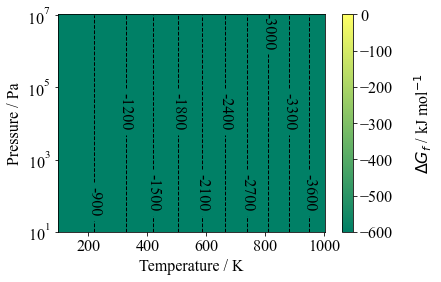

In [9]:

plots.plot_TvsP(T,P,GFE)

In [10]:
import numpy as np
pot_1 = np.array([[3,2,1],[4,1,1],[2,1,1]])
pot_2 = np.array([[0,0,2],[0,4,5],[0,4,5]])

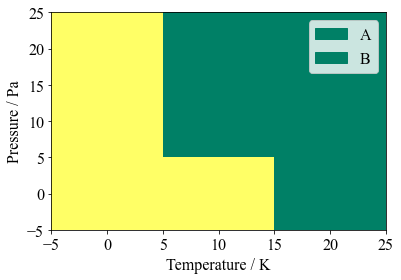

In [11]:
plots.plot_TvsP(np.array([0,10,20]),np.array([0,10,20]).transpose(),pot_1,
                pot_2,material_labels=["A","B"])

In [12]:
from thermopot import stability

In [13]:
min_pot = stability.find_stable_materials(pot_1,pot_2)

TypeError: find_stable_materials() takes 1 positional argument but 2 were given

In [ ]:
pot_1.shape

In [ ]:
min_pot

In [ ]:
pot_1 & min_pot

In [ ]:
pot_2 & min_pot

In [ ]:
pot_1

In [ ]:
pot_2

In [ ]:
min_pot == pot_1

In [ ]:
min_pot[min_pot == pot_1] = 11

In [ ]:
min_pot

In [ ]:
min_pot[min_pot == pot_2]=14

In [ ]:
min_pot